<a href="https://colab.research.google.com/github/AhmedAlYousif-AI/j4HGXQr7eHWdOtfK/blob/main/MonReader%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
#Importing the Essential libraries and their Functions

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow.keras

In [92]:
from tensorflow.keras.layers import Input, Dense, Activation, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.metrics import Accuracy

Importing the Dataset

In [93]:
data = "/content/drive/MyDrive/MonReader - Dataset/images"

In [94]:
training_path = "/content/drive/MyDrive/MonReader - Dataset/images/training"

testing_path = "/content/drive/MyDrive/MonReader - Dataset/images/testing"

In [95]:
#Calculating the Number of Images for each path

def count(dir, counter=0):
    "returns number of files in dir and subdirs"
    for pack in os.walk(dir):
        for f in pack[2]:
            counter += 1
    return dir + " : " + str(counter) + " files"



print('total images for Training data file :', count(training_path))
print('total images for Testing data file :', count(testing_path))
print('total images for data file :', count(data))

total images for Training data file : /content/drive/MyDrive/MonReader - Dataset/images/training : 2392 files
total images for Testing data file : /content/drive/MyDrive/MonReader - Dataset/images/testing : 606 files
total images for data file : /content/drive/MyDrive/MonReader - Dataset/images : 2998 files


In [96]:
#Printing the Classes of the data

import cv2

img_size = (224, 224)

SourcePath = '/content/drive/MyDrive/MonReader - Dataset/images'

for folder in os.listdir(SourcePath):
    folder_path = os.path.join(SourcePath, folder)
    for imageName in os.listdir(folder_path):
        img_path = os.path.join(folder_path, imageName)

        print("Filename:", imageName)  # Print the File Name
        print("Filepath:", img_path)  # Print the File Path

Filename: flip
Filepath: /content/drive/MyDrive/MonReader - Dataset/images/training/flip
Filename: notflip
Filepath: /content/drive/MyDrive/MonReader - Dataset/images/training/notflip
Filename: notflip
Filepath: /content/drive/MyDrive/MonReader - Dataset/images/testing/notflip
Filename: flip
Filepath: /content/drive/MyDrive/MonReader - Dataset/images/testing/flip


In [97]:
target_size = img_size
batch_size= 150

classes = ['flip', 'notflip']

In [98]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_data_generator = ImageDataGenerator()

testing_data_generator = ImageDataGenerator()

In [100]:
training_data = training_data_generator.flow_from_directory(training_path,
                                                            target_size=target_size,
                                                            batch_size=batch_size,
                                                            classes=classes,
                                                            class_mode='binary',
                                                            shuffle=True)


testing_data = testing_data_generator.flow_from_directory(testing_path,
                                                          target_size=target_size,
                                                          batch_size=batch_size,
                                                          classes=classes,
                                                          class_mode='binary',
                                                          shuffle=True)

Found 2392 images belonging to 2 classes.
Found 606 images belonging to 2 classes.


In [101]:
training_data.image_shape

(224, 224, 3)

In [102]:
testing_data.image_shape

(224, 224, 3)

**Building the Model**

CNN Architecture

In [103]:
model = Sequential([
        Conv2D(32, 3, activation="relu", input_shape=(224, 224, 3)),
        MaxPooling2D(pool_size=(2,2)),
        Conv2D(64, 3, activation="relu"),
        MaxPooling2D(pool_size=(2,2)),
        Conv2D(128, 3, activation="relu"),
        MaxPooling2D(pool_size=(2,2)),
        Conv2D(256, 3, activation="relu"),
        MaxPooling2D(pool_size=(2,2)),
        Flatten(),
        Dense(256, activation="relu"),
        Dense(1, activation="sigmoid")
])


model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │     9,437,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,826,113 (37.48 MB)

 Trainable params: 9,826,113 (37.48 MB)

 Non-trainable params: 0 (0.00 B)

In [104]:
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [105]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │     9,437,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,826,113 (37.48 MB)

 Trainable params: 9,826,113 (37.48 MB)

 Non-trainable params: 0 (0.00 B)

In [106]:
EarlyStopping = tensorflow.keras.callbacks.EarlyStopping(
    monitor='accuracy',
    patience=3,
    mode='max',
    restore_best_weights=False
)

In [107]:
history = model.fit(training_data, epochs=60, batch_size=batch_size, verbose=2, callbacks=[EarlyStopping])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/60
16/16 - 40s - 3s/step - accuracy: 0.5184 - loss: 68.5183
Epoch 2/60
16/16 - 41s - 3s/step - accuracy: 0.6066 - loss: 0.6546
Epoch 3/60
16/16 - 35s - 2s/step - accuracy: 0.7212 - loss: 0.5471
Epoch 4/60
16/16 - 38s - 2s/step - accuracy: 0.8035 - loss: 0.4189
Epoch 5/60
16/16 - 37s - 2s/step - accuracy: 0.8161 - loss: 0.4033
Epoch 6/60
16/16 - 38s - 2s/step - accuracy: 0.8725 - loss: 0.3088
Epoch 7/60
16/16 - 39s - 2s/step - accuracy: 0.9423 - loss: 0.1647
Epoch 8/60
16/16 - 36s - 2s/step - accuracy: 0.9724 - loss: 0.0904
Epoch 9/60
16/16 - 37s - 2s/step - accuracy: 0.9766 - loss: 0.0711
Epoch 10/60
16/16 - 38s - 2s/step - accuracy: 0.9795 - loss: 0.0654
Epoch 11/60
16/16 - 35s - 2s/step - accuracy: 0.9858 - loss: 0.0409
Epoch 12/60
16/16 - 38s - 2s/step - accuracy: 0.9946 - loss: 0.0224
Epoch 13/60
16/16 - 37s - 2s/step - accuracy: 0.9971 - loss: 0.0116
Epoch 14/60
16/16 - 35s - 2s/step - accuracy: 0.9975 - loss: 0.0102
Epoch 15/60
16/16 - 42s - 3s/step - accuracy: 0.9967 - l

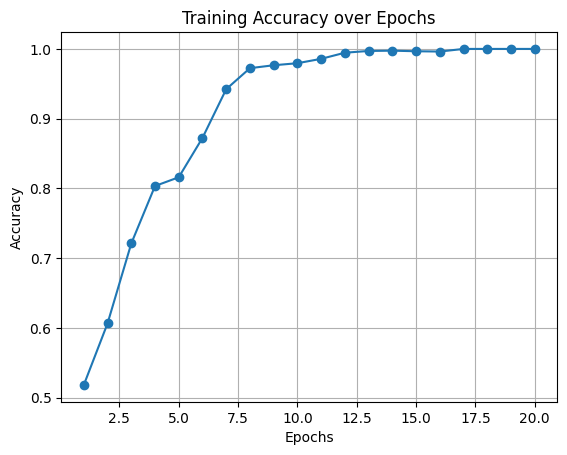

In [108]:
#Plotting the Accuracy using Matplotlib

epochs = range(1, len(history.history['accuracy']) + 1)
Accuracy = history.history['accuracy']

plt.plot(epochs, Accuracy, marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy over Epochs')
plt.grid(True)
plt.show()

In [109]:
model.evaluate(testing_data)

5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9992 - loss: 0.0048


[0.005506532732397318, 0.9983498454093933]

In [110]:
model.predict(testing_data).reshape(-1)

4/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2s/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step


array([2.84393464e-04, 9.99962211e-01, 9.99912381e-01, 5.18839691e-08,
       2.01344648e-08, 9.77434684e-04, 2.69037700e-05, 2.61510877e-06,
       9.99777615e-01, 2.47607144e-08, 9.99999642e-01, 2.14124398e-07,
       9.98471797e-01, 9.99481738e-01, 1.94563915e-03, 4.38007497e-08,
       9.99818385e-01, 1.99023849e-13, 1.00000000e+00, 5.47340923e-11,
       4.09770053e-07, 1.11814086e-06, 1.00000000e+00, 6.51418874e-09,
       9.99999523e-01, 9.99874711e-01, 9.99952555e-01, 5.78267993e-08,
       9.99889135e-01, 9.99998331e-01, 1.86743023e-07, 9.99991298e-01,
       9.99992251e-01, 9.74552989e-01, 1.42733887e-08, 9.98875201e-01,
       1.00000000e+00, 4.75472352e-03, 9.99753654e-01, 9.99958038e-01,
       1.29792711e-03, 1.00000000e+00, 1.15836167e-06, 1.88805402e-07,
       1.05633851e-04, 8.63700184e-15, 9.99967217e-01, 1.08390883e-01,
       9.99997854e-01, 9.99989033e-01, 2.41824779e-07, 2.66264288e-10,
       2.82164747e-05, 9.99222159e-01, 9.99939322e-01, 6.02106156e-05,
      

In [111]:
model.save('MonReader.h5')